In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

file_path = '/Users/iw2g24/PycharmProjects/COOKIES/bathy_data/'
line_1= 'in2026_v01_Line_094_rx0_000-002_processed-CH1_trace_nav_xy_bathy_profile_lonlat_depth.csv'
line_2 = 'in2026_v01_Line_095_rx0_processed-CH1_trace_nav_xy_bathy_profile_lonlat_depth.csv'
line_3 = 'in2026_v01_Line_096_rx0_processed-CH1_trace_nav_xy_bathy_profile_lonlat_depth.csv'

canyon_s = 'Collapse_TOPAS_merged_linea21_linea26_with_latlon.csv'

"""
Mean lon/lat at 010: 148.0286 / -65.1674 (010)
Mean lon/lat at 011: 147.3295 / -65.1580 (011)
Mean lon/lat at 012: 147.0278 / -65.1986 (012)
"""

# Read the two CSV files
df1 = pd.read_csv(file_path+ line_1)
df2 = pd.read_csv(file_path+ line_2)
df3 = pd.read_csv(file_path + line_3)

canyon_s = pd.read_csv(file_path+ canyon_s)

# # Combine them
# df = (
#     pd.concat([df1, df2, df3], ignore_index=True)
#       .sort_values("lon")
# )
#
#
# # Sort by lon
# df = df.sort_values("lon")
#
# # OPTION A: Drop duplicate depths (keep first)
# df = df.drop_duplicates(subset="lon", keep="first")
#
# # OPTION B (alternative): Average overlapping depths
# # df = df.groupby("depth_m", as_index=False)["lon"].mean()
#
# # Plot
# plt.figure(figsize=(12, 8))
# plt.plot(df["lon"], df["depth_m"])
# plt.gca().invert_xaxis()  # depth increases downward
# plt.xlabel("lon")
# plt.ylabel("Depth (m)")
# plt.title("Longitude vs Depth")
# plt.grid(True)
#
# plt.show()


<Figure size 1200x800 with 0 Axes>

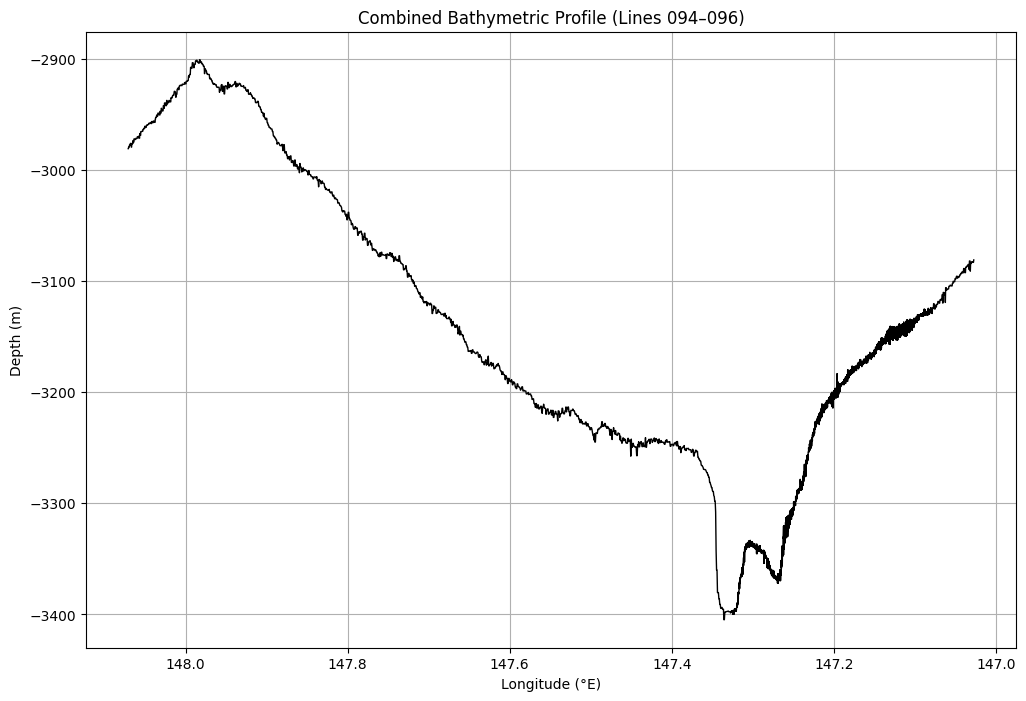

In [16]:
plt.figure(figsize=(12, 8))

df = (
    pd.concat([df1, df2, df3], ignore_index=True)
      .sort_values("lon")
)

plt.figure(figsize=(12, 8))

plt.plot(df["lon"], df["depth_m"], color='k', linewidth=1)

# plt.gca().invert_yaxis()   # depth increases downward
plt.xlabel("Longitude (°E)")
plt.ylabel("Depth (m)")
plt.title("Combined Bathymetric Profile (Lines 094–096)")
plt.grid(True)
plt.gca().invert_xaxis()

plt.show()





<Figure size 1200x800 with 0 Axes>

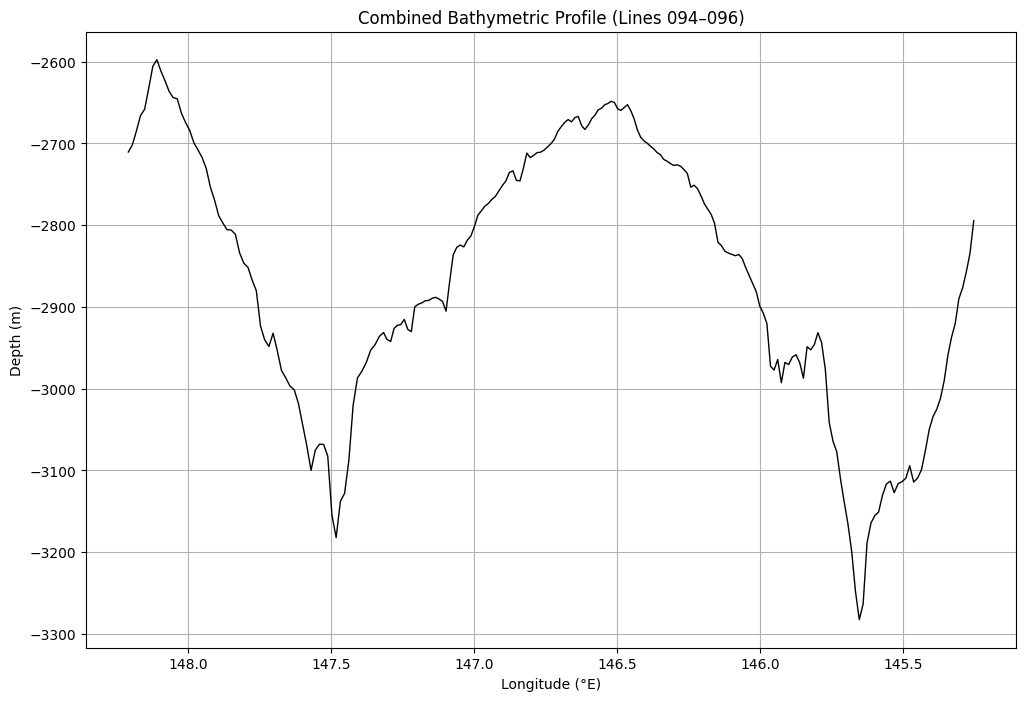

In [20]:
plt.figure(figsize=(12, 8))

df = (
    pd.concat([canyon_s], ignore_index=True)
      .sort_values("Longitude")
)

plt.figure(figsize=(12, 8))

plt.plot(df["Longitude"], df["bathy_m"], color='k', linewidth=1)

# plt.gca().invert_yaxis()   # depth increases downward
plt.xlabel("Longitude (°E)")
plt.ylabel("Depth (m)")
plt.title("Combined Bathymetric Profile (Lines 094–096)")
plt.grid(True)
plt.gca().invert_xaxis()

plt.show()




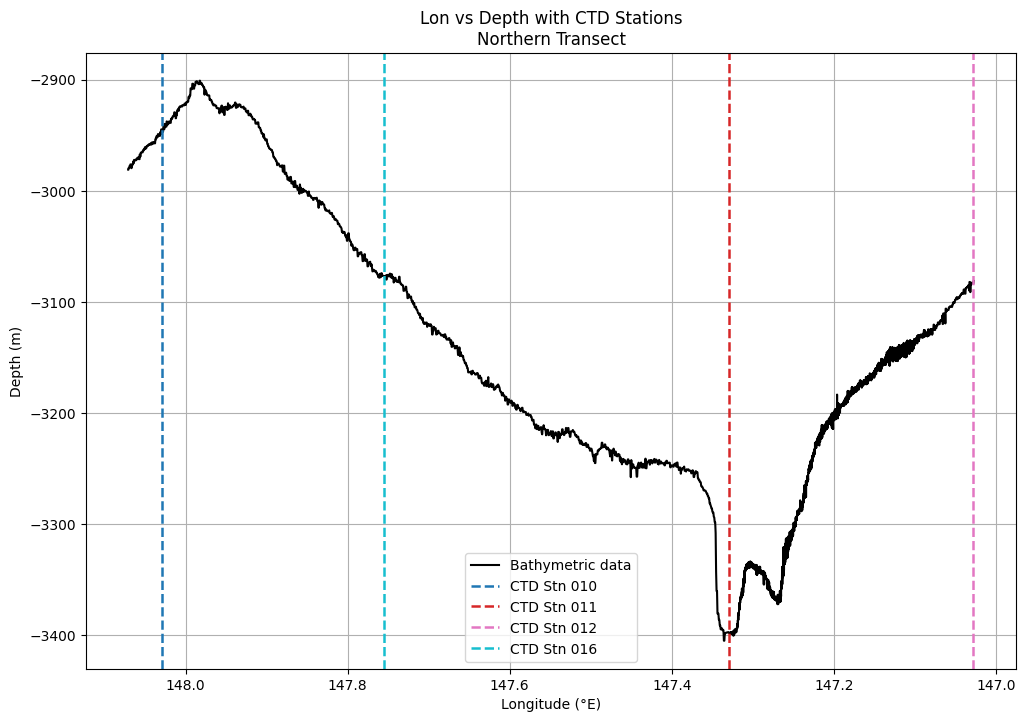

In [25]:
import matplotlib.pyplot as plt
import numpy as np

marker_lons = {
    "010": 148.0286,
    "011": 147.3295,
    "012": 147.0278,
    '016': 147.755467,
}

# Choose a colormap with enough contrast
cmap = plt.cm.tab10
colors = cmap(np.linspace(0, 1, len(marker_lons)))

plt.figure(figsize=(12, 8))

# Main bathymetry
plt.plot(df["lon"], df["depth_m"], color="black", label="Bathymetric data")

# Vertical station markers
for (label, lon), color in zip(marker_lons.items(), colors):
    plt.axvline(
        x=lon,
        linestyle="--",
        linewidth=1.8,
        color=color,
        label=f"CTD Stn {label}"
    )

plt.gca().invert_xaxis()
plt.xlabel("Longitude (°E)")
plt.ylabel("Depth (m)")
plt.title("Lon vs Depth with CTD Stations\nNorthern Transect")
plt.grid(True)
plt.legend()
plt.show()


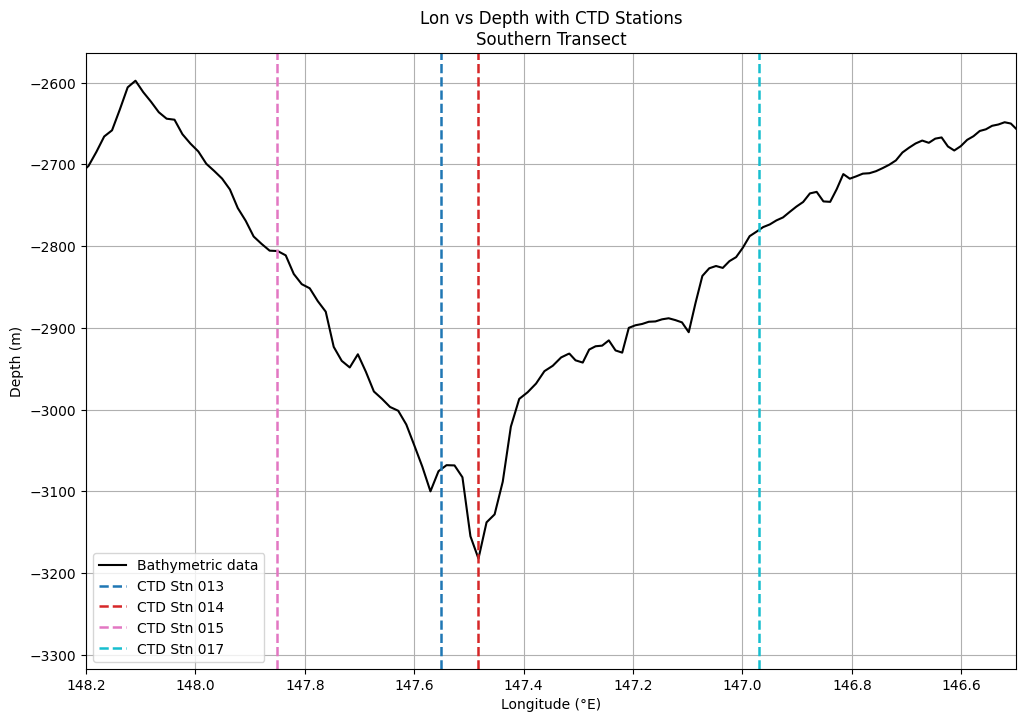

In [37]:
import matplotlib.pyplot as plt
import numpy as np

marker_lons = {
    "013": 147.550536,
    "014": 147.484228,
    "015": 147.85074,
    '017': 146.969315,
}

# Choose a colormap with enough contrast
cmap = plt.cm.tab10
colors = cmap(np.linspace(0, 1, len(marker_lons)))

plt.figure(figsize=(12, 8))

# Main bathymetry
plt.plot(df["Longitude"], df["bathy_m"], color="black", label="Bathymetric data")

# Vertical station markers
for (label, lon), color in zip(marker_lons.items(), colors):
    plt.axvline(
        x=lon,
        linestyle="--",
        linewidth=1.8,
        color=color,
        label=f"CTD Stn {label}"
    )

plt.gca().invert_xaxis()
plt.xlim(148.2, 146.5)
plt.xlabel("Longitude (°E)")
plt.ylabel("Depth (m)")
plt.title("Lon vs Depth with CTD Stations\nSouthern Transect")
plt.grid(True)
plt.legend()
plt.show()
